# CUSTOM IMAGE CLASSIFICATION

### Summary:
The intention here is to create a generic custom image classifier which can be used with any real world custom image classification. For example here we have used CATs vs DOGs for demo purpose. 

ORIGINAL DATA SOURCE:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

The Kaggle Competition: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!


### STEP1: Importing libraries and dataset

In [1]:
# import libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np # Import Numpy for data statistical analysis 
import cv2
import os
from PIL import Image

import matplotlib.pyplot as plt # Import matplotlib for data visualisation
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing import image
%matplotlib inline

Using TensorFlow backend.


### STEP2: Load Data

cat2 image shape: (397, 312, 3)


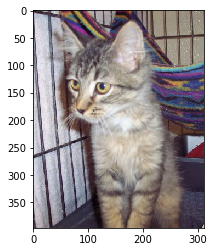

In [2]:
# Test if you can view the CAT image or not
cat2 = cv2.imread('../../DATASET/CATS_DOGS/train/CAT/2.jpg')
cat2 = cv2.cvtColor(cat2,cv2.COLOR_BGR2RGB)
type(cat2)
print('cat2 image shape:', (cat2.shape))
plt.imshow(cat2)

dog4 image shape: (288, 300, 3)


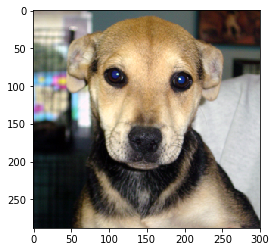

In [3]:
# Test if you can view the DOG image or not
dog4 = cv2.imread('../../DATASET/CATS_DOGS/train/DOG/4.jpg')
dog4 = cv2.cvtColor(dog4,cv2.COLOR_BGR2RGB)
type(dog4)
print('dog4 image shape:', (dog4.shape))
plt.imshow(dog4)

### STEP3 : Pre-Processing

### STEP3a : Image manupulation
The intention here is to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [4]:
# Let's use some data augmentaiton 
train_image_datagen = ImageDataGenerator(
       rotation_range=30, # rotate the image 30 degrees
       width_shift_range=0.1, # Shift the pic width by a max of 10%
       height_shift_range=0.1, # Shift the pic height by a max of 10%
       rescale=1/255, # Rescale the image by normalzing it.
       shear_range=0.2, # Shear means cutting away part of the image (max 20%)
       zoom_range=0.2, # Zoom in by 20% max
       horizontal_flip=True, # Allo horizontal flipping
       fill_mode='nearest' # Fill in missing pixels with the nearest filled value
      )

### STEP3(b) :Generating many manipulated images and image reshaping 

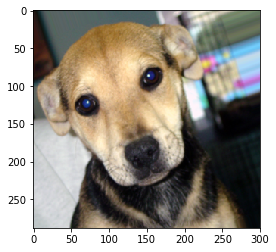

In [5]:
plt.imshow(train_image_datagen.random_transform(dog4))


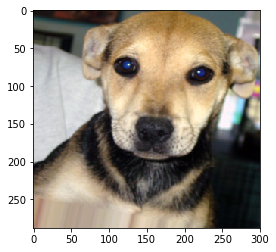

In [6]:
plt.imshow(train_image_datagen.random_transform(dog4))

### STEP3(b) :Generating many manipulated images and image reshaping 

In order to use **.flow_from_directory**, you must **organize the images in sub-directories**. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [7]:
# variable definitions
#Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.
img_rows, img_cols = 150, 150
color_img = 3
gray_img = 1
batch_size = 16
# width,height,channels
image_shape = (img_rows, img_cols, color_img)

In [8]:
# Generate many manipulated train images form the directory
train_image_datagen.flow_from_directory('../../DATASET/CATS_DOGS/train')

# Generate many manipulated test images form the directory
train_image_datagen.flow_from_directory('../../DATASET/CATS_DOGS/test')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


### STEP4: Create the Model

In [9]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# summary of Model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

### STEP5: Train the Model

In [10]:
batch_size = 16

train_image_gen = train_image_datagen.flow_from_directory('../../DATASET/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = train_image_datagen.flow_from_directory('../../DATASET/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

print('train_image_generator:',train_image_gen.class_indices)
print('test_image_generator:',test_image_gen.class_indices)

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.
train_image_generator: {'CAT': 0, 'DOG': 1}
test_image_generator: {'CAT': 0, 'DOG': 1}


In [11]:
history = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 146s 971ms/step - loss: 0.7043 - acc: 0.5085 - val_loss: 0.6930 - val_acc: 0.5001
Epoch 2/100
150/150 [==============================] - 129s 860ms/step - loss: 0.6909 - acc: 0.5225 - val_loss: 0.6870 - val_acc: 0.5703
Epoch 3/100
150/150 [==============================] - 142s 948ms/step - loss: 0.6904 - acc: 0.5463 - val_loss: 0.6890 - val_acc: 0.5380
Epoch 4/100
150/150 [==============================] - 141s 943ms/step - loss: 0.6894 - acc: 0.5312 - val_loss: 0.6750 - val_acc: 0.5831
Epoch 5/100
150/150 [==============================] - 133s 884ms/step - loss: 0.6760 - acc: 0.5833 - val_loss: 0.6701 - val_acc: 0.5905
Epoch 6/100
150/150 [==============================] - 134s 893ms/step - loss: 0.6545 - acc: 0.6200 - val_loss: 0.6717 - val_acc: 0.5895
Epoch 7/100
150/150 [==============================] - 164s 1s/step - loss: 0.6718 - acc: 0.5942 - val_loss: 0.6653 - val_acc: 0.6050
Epoch 8/100
150/150 [=======================

150/150 [==============================] - 161s 1s/step - loss: 0.4537 - acc: 0.7967 - val_loss: 0.4497 - val_acc: 0.7882
Epoch 62/100
150/150 [==============================] - 158s 1s/step - loss: 0.4512 - acc: 0.7903 - val_loss: 0.4345 - val_acc: 0.7997
Epoch 63/100
150/150 [==============================] - 156s 1s/step - loss: 0.4607 - acc: 0.7817 - val_loss: 0.4339 - val_acc: 0.7956
Epoch 64/100
150/150 [==============================] - 144s 962ms/step - loss: 0.4312 - acc: 0.7963 - val_loss: 0.4271 - val_acc: 0.8096
Epoch 65/100
150/150 [==============================] - 141s 938ms/step - loss: 0.4619 - acc: 0.7896 - val_loss: 0.4526 - val_acc: 0.7837
Epoch 66/100
150/150 [==============================] - 134s 895ms/step - loss: 0.4388 - acc: 0.7900 - val_loss: 0.5019 - val_acc: 0.7576
Epoch 67/100
150/150 [==============================] - 131s 876ms/step - loss: 0.4766 - acc: 0.7733 - val_loss: 0.4280 - val_acc: 0.8029
Epoch 68/100
150/150 [==============================] - 

In [12]:
model.save('custom_image_for_cats_dogs.h5')

### STEP6: Evaluate the model

### STEP6(a)  Plot Accuracy and Loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


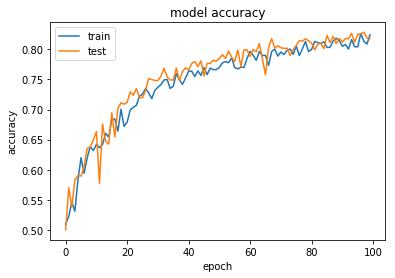

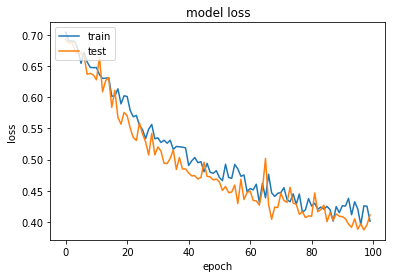

In [13]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### STEP6(b)  Predict new Images

### STEP6(b)  Display classification_report and  confusion_matrix

In [14]:
# load the new model
new_model = load_model('custom_image_for_cats_dogs.h5')

## Point the path of custom image to be tested
dog_file = '../../DATASET/CATS_DOGS/train/DOG/1008.jpg'
cat_file = '../../DATASET/CATS_DOGS/train/CAT/1008.jpg'

# define a functio that can use to process any custom image to the correct shape and array size. 
def test_img_processing(dog_file):
    custom_test_img = image.load_img(dog_file, target_size=(150,150))
    custom_test_img = image.img_to_array(custom_test_img)
    custom_test_img.shape
    custom_test_img = np.expand_dims(custom_test_img, axis=0)
    custom_test_img = custom_test_img/255
    return custom_test_img

print('CUSTOM IMAGE TEST 1:')
custom_dog_img = test_img_processing(dog_file)
print('Predicted Class: ',model.predict_classes(custom_dog_img))
if (model.predict_classes(custom_dog_img)) == 1:
    print ('Its a "" DOG  ""--> ' + 'Prediction accuracy: ',model.predict(custom_dog_img))
else: 
    print ('Its a "" CAT  ""--> ' + 'Prediction accuracy: ',model.predict(custom_dog_img))

print()

print('CUSTOM IMAGE TEST 2:')
custom_cat_img = test_img_processing(cat_file)
print('Predicted Class: ',model.predict_classes(custom_cat_img))
if (model.predict_classes(custom_cat_img)) == 1:
    print ('Its a "" DOG   ""  --> ' + 
           'Prediction accuracy: ',model.predict(custom_cat_img))
else: 
    print ('Its a "" CAT  "" --> ' + 'Prediction accuracy: ',model.predict(custom_cat_img))
    

CUSTOM IMAGE TEST 1:
Predicted Class:  [[1]]
Its a "" DOG  ""--> Prediction accuracy:  [[0.93492603]]

CUSTOM IMAGE TEST 2:
Predicted Class:  [[0]]
Its a "" CAT  "" --> Prediction accuracy:  [[0.46312493]]
